Name       : Brion Mallon

C A 1      : 

Input      : Use a songs metadata file contains a 10,000 record subset of http://labrosa.ee.columbia.edu/millionsong/
             List all files here

Process    : Apply the following actions 

           - Review the csv files for Data and Web mining Ca 

Songs file : this file contains 10,000 entries with track, artist, year and other attributes  


Start By importing required packages, get input songs file 

In [1]:
%matplotlib inline
import matplotlib as plt
import pandas as pd
import sqlite3 as db
from pandas.io import sql
# Create your connection.
cnx = db.connect(':memory:')    # this ensure sqlite tables stay in memory

##### There are currently 4 metafiles , read these for examination 


###### Files 
            -- songs.csv
            -- artist_tag.csv  
            -- artist_location.csv  
            -- artist_artist_similarty.csv 
 
 ###### Steps
 1. read all files into Dataframes 
 2. Copy the dataframes into SQLlite3 as tables, from here they can be examined using SQL
 3. If required, save any changes and rewrite csv files
       


First step ,  read all csv files 

In [2]:
songs = pd.read_csv("songs.csv", encoding='ISO-8859-1', dtype={'artist_familiarity': float,'artist_hotttnesss': float, 'year': int})  

artist_tag = pd.read_csv("artist_tag.csv" , encoding='ISO-8859-1') 

artist_location = pd.read_csv("artist_location.csv"  ,encoding='ISO-8859-1' , dtype={'Latitude': float,'Longitude': float})  

artist_artist_similarty = pd.read_csv("artist_artist_similarty.csv" , encoding='ISO-8859-1') 


Now, add all above file to a sqllite database

In [3]:
# write out all Dataframes, these can subsequently be read using SQL

sql.to_sql(songs, name='songs', if_exists='replace', con=cnx)
sql.to_sql(artist_tag, name='artist_tag', if_exists='replace', con=cnx)
sql.to_sql(artist_location, name='artist_location', if_exists='replace', con=cnx)
sql.to_sql(artist_artist_similarty, name='artist_artist_similarty', if_exists='replace', con=cnx)

Get a count of rows for each table 

In [4]:
 print(sql.read_sql_query('select count(*) as "songs count" from songs', cnx))
 print(sql.read_sql_query('select count(*) as "artist_tag count" from artist_tag', cnx))
 print(sql.read_sql_query('select count(*) as "artist_location count" from artist_location', cnx))
 print(sql.read_sql_query('select count(*) as "artist_artist_similarty count" from artist_artist_similarty', cnx))

   songs count
0        10000
   artist_tag count
0              3809
   artist_location count
0                   1402
   artist_artist_similarty count
0                          42969


So, the counts look ok. First check the songs table, select sample rows 

In [5]:
# SQl 
#
# select * 
# from songs  
# limit 10 
#

q1='select * from songs  limit 10'
pd = (sql.read_sql_query(q1, cnx))
pd.head(10)

,index,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,0,TRACCVZ128F4291A8A,Deep Sea Creature,SOVLGJY12A8C13FBED,Call of the Mastodon,ARMQHX71187B9890D3,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,280.21506,0.780462,0.574275,2001
1,1,TRACCMH128F428E4CD,No Quieras Marcharte,SOGDQZK12A8C13F37C,Adelante,AR2PT4M1187FB55B1A,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,191.68608,0.561590,0.420570,1984
2,2,TRACCSW128F148C7C3,If I...,SODMVJR12A6D4F985D,Ill Na Na,ARDI88R1187B98DAB2,fd87374e-ffde-4d36-89a8-8a073f795666,Foxy Brown,222.92853,0.687687,0.406686,0
3,3,TRACCXJ128F428F0CF,Werther - Lyric Drama in four Acts/Act I/Alors...,SOIWBDR12A8C13A4AC,Massenet: Werther,ARUKJUP12086C14589,8a5f2736-bcde-4a2e-8d50-72631d66a7ef,RamÃ³n Vargas;Vladimir Jurowski,278.38649,0.391741,0.291265,0
4,4,TRACCVS12903D014F8,Ad Te Clamamus Exsvles Mortva Liberi,SOHCCIA12AC907577F,Pentagrammaton,ARZEWUR1187FB53DC8,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,89.15546,0.593416,0.395710,2010
5,5,TRACCKS128F42B77AE,Murder One,SOBOAQC12A8C13E3E9,BTNHRESURRECTION,ARUZRFN1187B98AC05,2fa45bbb-0efb-4950-9d40-94bf23cbfec1,Bone Thugs-N-Harmony,255.73832,0.815923,0.555138,2000
6,6,TRACCQM12903CACC1E,On My Feet Again,SOKVLHX12AB0187B39,Utopia,ARHBWOZ1187FB3FD53,e6ff2839-5ccb-451b-b07e-f485bc143118,Utopia,239.59465,0.543937,0.430300,0
7,7,TRACCUS128F92E1FEB,Bedroom Acoustics,SOMMSMW12A8C13FCCC,Plug In Baby,ARR3ONV1187B9A2F59,fd857293-5ab8-40de-b29e-55a69d4e4d0f,Muse,156.96934,0.929030,0.750427,0
8,8,TRACCJA128F149A144,Segredo,SODPNJR12A6D4FA52D,Joao Voz E Violato,AR3THYK1187B999F1F,286ec4c2-b5ca-4f85-b331-280a6d73dd14,JoÃ£o Gilberto,197.19791,0.645192,0.471224,2000
9,9,TRACCGB12903CD1B90,Sajana (Ft Faheem Mazhar),SOFFLLP12AB018ED52,The Lost Souls Bonus EP,ARFELOH1187B991F95,65b785d9-499f-48e6-9063-3a1fd1bd488d,Niraj Chag,262.58240,0.495819,0.342765,0


In [6]:
# Get a count of unique artists on the songs file
#
# Sql
#
# select count(distinct(artist_id || artist_name )) 
# from songs

q1='select count(distinct(artist_id || artist_name )) from songs'
pd = (sql.read_sql_query(q1, cnx))
pd.head()

,count(distinct(artist_id || artist_name ))
0,4437


AS there are only 4437 artists for the 10,000 songs, some artists have multiple entries.  we will have to make a seperate file of distinct artists. Select artist id and name .


In [7]:
#
# Sql
#
# select distinct artist_id, artist_name 
# from songs

artist_id_name = (sql.read_sql_query('select distinct artist_id, artist_name from songs', cnx))

# write a version to sqllite
sql.to_sql(artist_id_name, name='artist_id_name', if_exists='replace', con=cnx)

# write a version as a csv file 
artist_id_name.to_csv('artist_id_name.csv',  encoding='ISO-8859-1')

print(len(artist_id_name.index))

4437


 Now, go to the artist_tags table and get a distinct list of tags (first select from table)

In [8]:
#
# Sql
#
# select * 
# from artist_tag  
# limit 10

q1='select * from artist_tag  limit 10'
pd = (sql.read_sql_query(q1, cnx))
pd.head(10)

,index,artist_id,mbtag
0,0,AR00A6H1187FB5402A,detroit
1,1,AR00A6H1187FB5402A,punk
2,2,AR00A6H1187FB5402A,michigan
3,3,AR00A6H1187FB5402A,usa
4,4,AR01VU31187B997DA0,hard rock
5,5,AR01VU31187B997DA0,rock
6,6,AR01VU31187B997DA0,american
7,7,AR01W2D1187FB5912F,united states
8,8,AR022JO1187B99587B,production music
9,9,AR02IU11187FB513F2,jazz


Now, check how many unique Tags exist on on_artist_tag

First, get a list of distinct tags

In [9]:
#
# Sql
#
# select distinct(mbtag) 
# from artist_tag

q1='select distinct(mbtag) from artist_tag'
mbtags = (sql.read_sql_query(q1, cnx))
print(len(mbtags.index))
mbtags.head(20)

726


,mbtag
0,detroit
1,punk
2,michigan
3,usa
4,hard rock
5,rock
6,american
7,united states
8,production music
9,jazz


There are 720 distinct mbtags,  create a file of these 

In [10]:
# write a version to sqllite
sql.to_sql(mbtags, name='mbtags', if_exists='replace', con=cnx)
# write a version as a csv file 
mbtags.to_csv('mbtags.csv', encoding='ISO-8859-1')

Now, get count of tags for each artist, order desc by count

In [11]:
#
# Sql
#
# select artist_id, count(*) as "count" 
# from artist_tag 
# group by artist_id 
# order by 2 desc

q1='select artist_id, count(*) as "count" from artist_tag group by artist_id order by 2 desc'
pd = (sql.read_sql_query(q1, cnx))
pd.head(10) 

,artist_id,count
0,AR4L4WQ1187FB51996,20
1,AR6XZ861187FB4CECD,20
2,ARMJMBJ1187B98C46F,20
3,ARXPPEY1187FB51DF4,20
4,ARAXU5Z1187B98FECD,17
5,ART5MUE1187B98C961,17
6,AR5FP401187FB523C9,16
7,ARASYMJ1187B9ACAF2,16
8,ARN5NHX1187FB4F755,16
9,ARNHHIV1187FB4EA23,16


Now, get a count of the number of artists have a given number of tags  (e.g say 3 artists have 20 and so on)
( do an inner and outer group by )

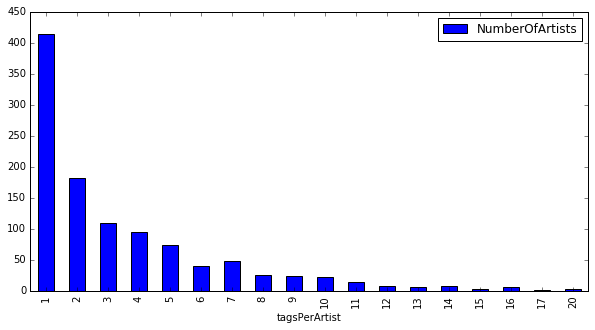

In [12]:
#
# Sql
#
# select a.tagsPerArtist, count(*) as "NumberOfArtists" 
# from ( select count(*) as "tagsPerArtist" 
#        from artist_tag 
#        group by artist_id) a 
# group by a.tagsPerArtist 
# order by 1 desc '

q1 = 'select a.tagsPerArtist, count(*) as "NumberOfArtists" from ( select count(*) as "tagsPerArtist" from artist_tag group by artist_id) a group by a.tagsPerArtist order by 1 '
pd = (sql.read_sql_query(q1, cnx))

pd.plot(kind='bar',x='tagsPerArtist',y='NumberOfArtists',figsize=(10, 5))

# Note on plot below, this plot the number of artists that have a given number of tags

now, select all tags for one artist, also join on artist_id_name to get artist name (use artist_id from above, one with 20 tags)

In [29]:
#
# Sql
#
# select a.artist_id, b.artist_name ,a.mbtag 
# from artist_tag a 
#         inner join artist_id_name b 
#            on a.artist_id = b.artist_id 
# where a.artist_id = "AR4L4WQ1187FB51996" '
 
q1 = 'select a.artist_id, b.artist_name ,a.mbtag from artist_tag a inner join artist_id_name b on a.artist_id = b.artist_id where a.artist_id = "AR4L4WQ1187FB51996" '

pd = (sql.read_sql_query(q1, cnx))
pd.head(20)

,artist_id,artist_name,mbtag
0,AR4L4WQ1187FB51996,The Prodigy,electronic
1,AR4L4WQ1187FB51996,The Prodigy,british
2,AR4L4WQ1187FB51996,The Prodigy,big beat
3,AR4L4WQ1187FB51996,The Prodigy,techno
4,AR4L4WQ1187FB51996,The Prodigy,hardcore
5,AR4L4WQ1187FB51996,The Prodigy,uk
6,AR4L4WQ1187FB51996,The Prodigy,electropunk
7,AR4L4WQ1187FB51996,The Prodigy,braintree
8,AR4L4WQ1187FB51996,The Prodigy,dance and electronica
9,AR4L4WQ1187FB51996,The Prodigy,breakbeat hardcore


Interesting, the artists 'The Prodigy' have an extensive list of tags. 

Now, check how many occurances there are for each of the prodigy tags ( check how connected they could be)

In [14]:
#
# Sql
#
# select mbtag, count(*) as "count" 
# from artist_tag  
# where mbtag in 
#      ( select mbtag 
#        from artist_tag 
#        where artist_id = "AR4L4WQ1187FB51996" )
# group by mbtag 
# order by 2 desc '

q1 = 'select mbtag, count(*) as "count" from artist_tag  where mbtag in ( select mbtag from artist_tag where artist_id = "AR4L4WQ1187FB51996" ) group by mbtag order by 2 desc '
pd = (sql.read_sql_query(q1, cnx))
pd.head(20)

,mbtag,count
0,british,122
1,uk,119
2,english,87
3,alternative rock,52
4,electronic,50
5,dance and electronica,24
6,britannique,21
7,electronica,14
8,dance,9
9,techno,9


This looks good, there are a lot of connections 

Now, get the avg number of tags for an artist

In [15]:
#
# Sql
#
# select avg(a.count) 
# from (select count(*) as "count" 
#       from artist_id_name 
#       group by artist_id) a 

q1 = 'select avg(a.count) from (select count(*) as "count" from artist_id_name group by artist_id) a '
pd = (sql.read_sql_query(q1, cnx))
pd.head()

,avg(a.count)
0,1.141204


So, the avg tags for most artists will be about 1, thats ok 

####### Now, check if any artists with Tags have no songs OR artists with songs have no tags 

####### Summary of below

All artists on the artist_tag table have a song on the songs table, which is grand.
There are only about 1090 unique artists on artist_tag table so about 3060 artists on the songs table are without any tags 


In [16]:
# select a count of artists on the artist_tags table that do not have a song (check against artist_id_name table)

#
# Sql
#
# select "No of Artists on Tags w/o songs", count(*) as "count" 
# from artist_tag 
# where artist_id not in (select artist_id 
#                         from artist_id_name)


q1='select "No of Artists on Tags w/o songs", count(*) as "count" from artist_tag where artist_id not in (select artist_id from artist_id_name)'
pd = (sql.read_sql_query(q1, cnx))
pd.head(10) 

,"""No of Artists on Tags w/o songs""",count
0,No of Artists on Tags w/o songs,0


In [17]:
# select a count of artists with a song but no tag on the artist_tag (check using artist_id_name table)

#
# Sql
#
# select "No of Artists on Songs w/o tags", count(*) as "count" 
# from artist_id_name 
# where artist_id not in (select artist_id 
#                         from artist_tag)

q1='select "No of Artists on Songs w/o tags", count(*) as "count" from artist_id_name where artist_id not in (select artist_id from artist_tag)'
pd = (sql.read_sql_query(q1, cnx))
pd.head(10) 

,"""No of Artists on Songs w/o tags""",count
0,No of Artists on Songs w/o tags,3106


In [18]:
# im not sure about this must do a count of distinct artist_ids on on the artist_tag table, if there are
# only around 1000 or so, then its ok

#
# Sql
#
# select count(distinct artist_id ) 
# from artist_tag

q1='select count(distinct artist_id ) from artist_tag'
pd = (sql.read_sql_query(q1, cnx))
pd.head(10) 

,count(distinct artist_id )
0,1091


Now, go to the artist_artist_similarty table and get a count of of artists that are similar to an artist (first select from table)

In [19]:
#
# Sql
#
# select * 
# from artist_artist_similarty 
# limit 10

q1 = 'select * from artist_artist_similarty limit 10'
pd = (sql.read_sql_query(q1, cnx))
pd.head(10)

,index,target,similar
0,0,AR009211187B989185,ARHINI31187B995C1D
1,1,AR009211187B989185,ARI0PUX1187FB3F215
2,2,AR009211187B989185,AR9RTS51187B996CC8
3,3,AR009211187B989185,ARS1DCR1187B9A4A56
4,4,AR009211187B989185,ARTPGR61187B98B0F6
5,5,AR009211187B989185,ARIYH1U1187B9AF8A3
6,6,AR009211187B989185,ARHB1961187B9B1732
7,7,AR009211187B989185,ARI4SKQ1187B9B43B0
8,8,AR009211187B989185,AR3OSJM1187B98B95B
9,9,AR009211187B989185,ARIRD6J1187FB5A98C


the above shows the target (artist) and similar artists
Now, get a count of similar artists for an artists 

In [20]:
#
# Sql
#
# select a.target, count(*) as "count" 
# from artist_artist_similarty a 
# group by a.target 
# order by 2 desc 

q1 = 'select a.target, count(*) as "count" from artist_artist_similarty a group by a.target order by 2 desc '
pd = (sql.read_sql_query(q1, cnx))
pd.head(10)

,target,count
0,ARB1LM61187FB4DDF4,47
1,ARF3XJD1187FB38DE0,47
2,ARRZFUG1187B98AD42,46
3,ARGUACZ1187FB3F35C,45
4,AR95F611187B99CE1C,44
5,AREB9421187FB458EF,43
6,ARF9BNW1187FB3F54B,43
7,ARGHPIE1187FB3CCDF,40
8,AR6ZYK41187B9996BB,39
9,ARC28SN1187B989049,39


There are many connections, select all similar artists for one artist, also join on artist_id_name to get artist name (use artist_id 'target' from above, one with 45 similar artists)

In [21]:
#
# Sql
#
# select b.artist_name, c.artist_name 
# from artist_artist_similarty a 
#      inner join artist_id_name b 
#          on a.target = b.artist_id  
#      inner join artist_id_name c 
#          on a.similar = c.artist_id  
# where a.target = "ARGUACZ1187FB3F35C" 

q1 = 'select b.artist_name, c.artist_name from artist_artist_similarty a inner join artist_id_name b on a.target = b.artist_id  inner join artist_id_name c on a.similar = c.artist_id  where a.target = "ARGUACZ1187FB3F35C" '
pd = (sql.read_sql_query(q1, cnx))
pd.head(20)

,artist_name,artist_name
0,Connie Smith,Tammy Wynette
1,Connie Smith,Hank Locklin
2,Connie Smith,Ray Price
3,Connie Smith,Porter Wagoner
4,Connie Smith,Sonny James
5,Connie Smith,Dottie West
6,Connie Smith,Kitty Wells
7,Connie Smith,Don Gibson
8,Connie Smith,Donna Fargo
9,Connie Smith,Loretta Lynn


The artist - artist connections are looking good
Now, get the avg number of similar artists for an artist

In [22]:
#
# Sql
#
# select avg(a.count) 
# from (select count(*) as "count"  
#       from artist_artist_similarty 
#       group by target) a

q1 = 'select avg(a.count) from (select count(*) as "count" from artist_artist_similarty group by target) a '
pd = (sql.read_sql_query(q1, cnx))
pd.head()

,avg(a.count)
0,11.409719


An avg of 11 similar artists for a given artist is plenty for connections  

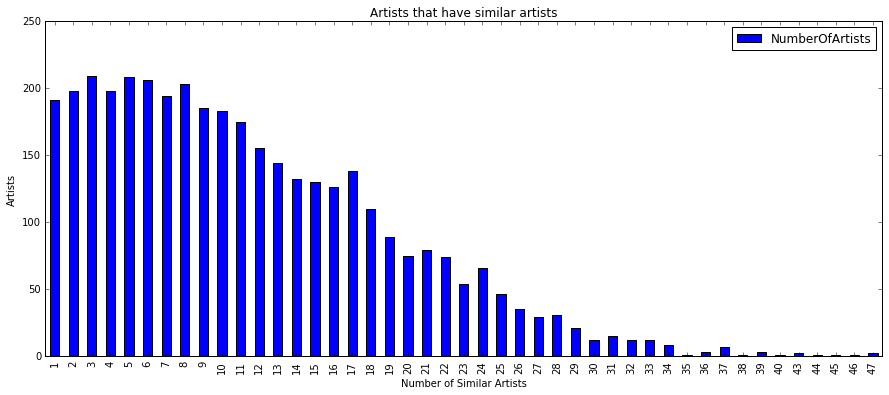

In [31]:
#
# Sql
#
# select a.SimilarPerArtist, count(*) as "NumberOfArtists" 
# from ( select count(*) as "SimilarPerArtist" 
#        from artist_artist_similarty 
#        group by target) a 
# group by a.SimilarPerArtist 
# order by 1 desc '

q1 = 'select a.SimilarPerArtist, count(*) as "NumberOfArtists" from ( select count(*) as "SimilarPerArtist" from artist_artist_similarty group by target) a group by a.SimilarPerArtist order by 1 '
pd = (sql.read_sql_query(q1, cnx))

plot1 = pd.plot(kind='bar',x='SimilarPerArtist',y='NumberOfArtists',figsize=(15, 6))
plot1 = plot1.set(title="Artists that have similar artists",xlabel="Number of Similar Artists",ylabel="Artists")

# Note on plot below, this plot the number of artists that have a given number of similar artists 

#pd.plot.scatter(x='SimilarPerArtist', y='NumberOfArtists', s=pd['NumberOfArtists']);

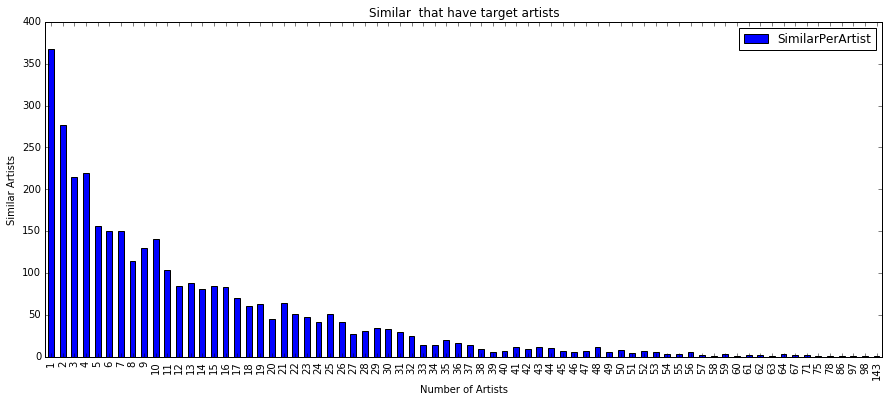

In [34]:
#   This is the reverse of the previous Query, 


# Sql
#
# select a.NumberOfArtists, count(*) as "SimilarPerArtist" 
# from ( select count(*) as "NumberOfArtists" 
#        from artist_artist_similarty 
#        group by similar) a 
# group by a.NumberOfArtists 
# order by 1 '

q1= 'select a.NumberOfArtists, count(*) as "SimilarPerArtist" from ( select count(*) as "NumberOfArtists" from artist_artist_similarty group by similar) a group by a.NumberOfArtists order by 1 '
pd = (sql.read_sql_query(q1, cnx))

plot1 = pd.plot(kind='bar',x='NumberOfArtists',y='SimilarPerArtist',figsize=(15, 6))
plot1 = plot1.set(title="Similar  that have target artists",xlabel="Number of Artists",ylabel="Similar Artists")

# Note on plot below, this plot the number of artists that have a given number of similar artists 

# ALSO, reading the graph below, these is a similar artist  that is associated with 143 target artists, Thats a lot, after running
# query below, i found the similar band is The Rolling Stones, that now makes sence. 

 

In [42]:
 q1= ' select a.artist_name, b.count from  artist_id_name a  inner join (select similar, count(*) as "count"  from artist_artist_similarty group by similar ) b on a.artist_id = b.similar order by  2 desc limit 5 '
pd = (sql.read_sql_query(q1, cnx))
pd.head()

#the list below is are the top ranked bands other artists are said to be similar to (rolling stones has 143 artist that are said to be similar to them)

,artist_name,count
0,The Rolling Stones,143
1,Led Zeppelin,98
2,The Beatles,97
3,The Beatles / Tony Sheridan,97
4,Sonny Landreth,86


####### Now, check if any artists with similar artists have no songs OR artists with songs have enteries on the similar table
(note : As both columns on the artist_artist_similar table as artist_ID values (target and similar), i check both on the artist
table. I did this in one sql statement using a join, just easier to see results together.

####### Summary of below

All artists on the artist_artist_similar table have a song on the songs table, there are about 3700 of these, good.
There are about about 530 artists on the songs table are without a target reference on the artist_artist_similarty table

In [24]:
# select a count of artists on the artist_artist_similar table that do not have a song, use union (check against artist_id_name table)

#
# Sql
#
# select "Num of Artists in similar w/o songs", count(*) as "count" 
# from artist_artist_similarty 
# where target not in (select artist_id 
#                      from artist_id_name) 
# union 
# select "Num of similar Artists in similar w/o songs", count(*) as "count" 
# from artist_artist_similarty 
# where similar not in (select artist_id 
#                       from artist_id_name) 


q1='select "Num of Artists in similar w/o songs", count(*) as "count" from artist_artist_similarty where target not in (select artist_id from artist_id_name) union select "Num of similar Artists in similar w/o songs", count(*) as "count" from artist_artist_similarty where similar not in (select artist_id from artist_id_name) '
pd = (sql.read_sql_query(q1, cnx))
pd.head(10) 

,"""Num of Artists in similar w/o songs""",count
0,Num of Artists in similar w/o songs,0
1,Num of similar Artists in similar w/o songs,0


In [25]:
# select a count of artists on the artist_artist_similar table that do not have a song, use union (check against artist_id_name table)

#
# Sql
#
# select "No of Artists on Songs w/o similar", count(*) as "count" 
# from artist_id_name 
# where artist_id not in (select target 
#                         from artist_artist_similarty) 
# union 
# select "No of Artists on Songs w/o matched Artists", count(*) as "count" 
# from artist_id_name 
# where artist_id not in (select similar 
#                         from artist_artist_similarty) 

q1='select "No of Artists on Songs w/o similar", count(*) as "count" from artist_id_name where artist_id not in (select target from artist_artist_similarty) union select "No of Artists on Songs w/o matched Artists", count(*) as "count" from artist_id_name where artist_id not in (select similar from artist_artist_similarty) '
pd = (sql.read_sql_query(q1, cnx))
pd.head(10) 

,"""No of Artists on Songs w/o similar""",count
0,No of Artists on Songs w/o matched Artists,532
1,No of Artists on Songs w/o similar,127


In [26]:
# do a count of distinct targets (artist_ids) on the artist_artist_similar table 

#
# Sql
#
# select count(distinct target ) 
# from artist_artist_similarty

q1='select count(distinct target ) from artist_artist_similarty'
pd = (sql.read_sql_query(q1, cnx))
pd.head(10) 

,count(distinct target )
0,3766
